In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector

/home/tiagoooliveira/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#12-lead ECG recordings (leads I, II, II, aVR, aVL,aVF, V1, V2, V3, V4, V5, and V6) 
#The leads are recorded simultaneously

#Simulating 12-leads signals
#normalized interval (-1) -> (1)
def ecg_gen(batch_size):
    seq_length = 10

    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = random.random() * 2 * np.pi

        lead_1 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        lead_2 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        
        lead_3 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        lead_aVR = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        
        lead_aVL = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        lead_aVF = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        
        lead_V1 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        lead_V2 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        
        lead_V3 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        lead_V4 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        
        lead_V5 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        lead_V6 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        
        
        x_lead_1 = lead_1[:seq_length]
        y_lead_1 = lead_1[seq_length:]
        
        x_lead_2 = lead_2[:seq_length]
        y_lead_2 = lead_2[seq_length:]
        
        x_lead_3 = lead_3[:seq_length]
        y_lead_3 = lead_3[seq_length:]
        
        x_lead_aVR = lead_aVR[:seq_length]
        y_lead_aVR = lead_aVR[seq_length:]
                
        x_lead_aVL = lead_aVL[:seq_length]
        y_lead_aVL = lead_aVL[seq_length:]
        
        x_lead_aVF = lead_aVF[:seq_length]
        y_lead_aVF = lead_aVF[seq_length:]
              
        x_lead_V1 = lead_V1[:seq_length]
        y_lead_V1 = lead_V1[seq_length:]
        
        x_lead_V2 = lead_V2[:seq_length]
        y_lead_V2 = lead_V2[seq_length:]
        
        x_lead_V3 = lead_V3[:seq_length]
        y_lead_V3 = lead_V3[seq_length:]
        
        x_lead_V4 = lead_V4[:seq_length]
        y_lead_V4 = lead_V4[seq_length:]
        
        x_lead_V5 = lead_V5[:seq_length]
        y_lead_V5 = lead_V5[seq_length:]
        
        x_lead_V6 = lead_V6[:seq_length]
        y_lead_V6 = lead_V6[seq_length:]
        
        x_ = np.array([x_lead_1, x_lead_2, x_lead_3, x_lead_aVR, x_lead_aVL, x_lead_aVF, x_lead_V1, x_lead_V2, x_lead_V3, x_lead_V4, x_lead_V5, x_lead_V6])
        y_ = np.array([y_lead_1, y_lead_2, y_lead_3, y_lead_aVR, y_lead_aVL, y_lead_aVF, y_lead_V1, y_lead_V2, y_lead_V3, y_lead_V4, y_lead_V5, y_lead_V6])
        
        x_, y_ = x_.T, y_.T

        batch_x.append(x_)
        batch_y.append(y_)

    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)

    return batch_x, batch_y

In [21]:
b_size = 5
n_epoch = 3
X_train, Y_train = ecg_gen(batch_size)

X_train

m = Sequential()

#Autoencoder
m.add(LSTM(12, input_shape=(10, 12)))
m.add(RepeatVector(10))
m.add(LSTM(12, return_sequences=True))

print(m.summary())

m.compile(loss='mse', optimizer='adam')

history = m.fit(X_train, Y_train, n_epoch, b_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 12)                1200      
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 10, 12)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 12)            1200      
Total params: 2,400
Trainable params: 2,400
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
10/10 [==============================] - 1s 97ms/step - loss: 0.4932
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.4883
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 0.4842
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 0.4802
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.4764


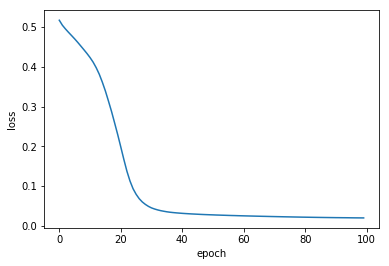

In [5]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

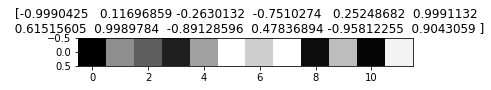

In [6]:
X_test, _ = ecg_gen(1)
decoded_imgs = m.predict(X_test)

encoder = Model(m.layers[0].input, m.layers[0].output)
encoded_imgs = encoder.predict(X_test)

for i in range(len(encoded_imgs)):
    plt.imshow(encoded_imgs[i].reshape((1, 12)))
    plt.gray()
plt.title(encoded_imgs[i])
dos_numeros = encoded_imgs[i]
plt.show()


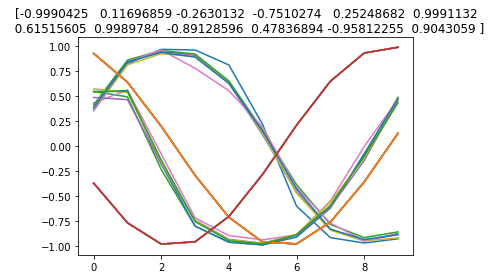

In [7]:

for i in range(12):
    plt.plot(range(10), decoded_imgs[0, :, i])
    plt.plot(range(10), X_test[0, :, i])
plt.title(dos_numeros)
plt.show()

In [8]:
X_test

array([[[ 0.92941794, -0.36902884,  0.92941794, -0.36902884,
          0.92941794, -0.36902884,  0.92941794, -0.36902884,
          0.92941794, -0.36902884,  0.92941794, -0.36902884],
        [ 0.64176037, -0.76690523,  0.64176037, -0.76690523,
          0.64176037, -0.76690523,  0.64176037, -0.76690523,
          0.64176037, -0.76690523,  0.64176037, -0.76690523],
        [ 0.19940486, -0.97991719,  0.19940486, -0.97991719,
          0.19940486, -0.97991719,  0.19940486, -0.97991719,
          0.19940486, -0.97991719,  0.19940486, -0.97991719],
        [-0.29101769, -0.95671767, -0.29101769, -0.95671767,
         -0.29101769, -0.95671767, -0.29101769, -0.95671767,
         -0.29101769, -0.95671767, -0.29101769, -0.95671767],
        [-0.7112897 , -0.70289897, -0.7112897 , -0.70289897,
         -0.7112897 , -0.70289897, -0.7112897 , -0.70289897,
         -0.7112897 , -0.70289897, -0.7112897 , -0.70289897],
        [-0.96010356, -0.27964471, -0.96010356, -0.27964471,
         -0.9601035

/home/tiagoooliveira/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


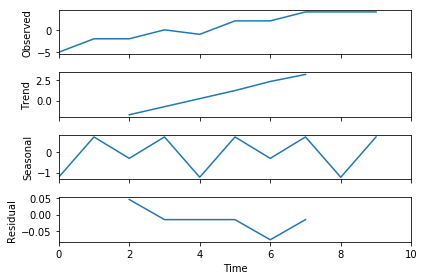

In [9]:


from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(3) for i in range(-5,5)]
result = seasonal_decompose(series, model='additive', freq=4)
result.plot()
pyplot.show()


In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

In [4]:
#dbs = wfdb.get_dbs()
#display(dbs)
os.getcwd()


'/home/tiagoooliveira/Documents/DataScience_Retreat_Jan2018/Project_Portifolio/git/notebook'

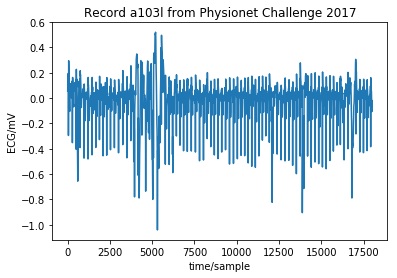

{'adc_gain': [1000.0],
 'adc_res': [16],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': '2014',
 'baseline': [0],
 'block_size': [0],
 'byte_offset': [24],
 'checksum': [0],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['A00003.mat'],
 'fmt': ['16'],
 'fs': 300,
 'init_value': [56],
 'n_sig': 1,
 'p_signal': array([[ 0.056],
        [ 0.073],
        [ 0.085],
        ...,
        [-0.064],
        [-0.036],
        [-0.02 ]]),
 'record_name': 'A00003',
 'samps_per_frame': [1],
 'sig_len': 18000,
 'sig_name': ['ECG'],
 'skew': [None],
 'units': ['mV']}

(18000, 1)
None
(18000, 1)
None
{'record_name': 'A00010', 'n_sig': 1, 'fs': 300, 'counter_freq': None, 'base_counter': None, 'sig_len': 18000, 'base_time': '2014', 'base_date': None, 'comments': [], 'sig_name': ['ECG'], 'p_signal': array([[-1.028],
       [-1.225],
       [-1.418],
       ...,
       [ 0.01 ],
       [ 0.009],
       [ 0.009]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['A00010.mat'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [24], 'adc_gain': [1000.0], 'baseline': [0], 'units': ['mV'], 'adc_res': [16], 'adc_zero': [0], 'init_value': [-1028], 'checksum': [0], 'block_size': [0]}
(9000, 1)
None
{'record_name': 'A00011', 'n_sig': 1, 'fs': 300, 'counter_freq': None, 'base_counter': None, 'sig_len': 9000, 'base_time': '2014', 'base_date': None, 'comments': [], 'sig_name': ['ECG'], 'p_signal': array([[-0.069],
       [-0.089],
       [-0.108],
       ...,
       [ 0.096],
       [ 0.079],
       [ 0.062]]), 'd_signal'

In [53]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
os.getcwd()
record = wfdb.rdrecord('../../Databases/physionet/training_2017/training/A00003', channels='all')
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2017') 
display(record.__dict__)


# Can also read the same files hosted on Physiobank https://physionet.org/physiobank/database/
# in the challenge/2015/training/ database subdirectory. Full url = https://physionet.org/physiobank/database/challenge/2015/training/
#record2 = wfdb.rdrecord('a103l', pb_dir = 'challenge/2015/training/')

#display(record.e_p_signal)
# Show that different channels have different lengths. Channel 1 has 2 samples/frame, hence has 2x as many samples.
#print([len(s) for s in record.p_signal])
print(record.p_signal.shape)
print(record.base_date)
#for t in record.p_signal:
#    print(t[0])

for x in range(10, 55):
    itera = wfdb.rdrecord('../../Databases/physionet/training_2017/training/A000'+str(x), channels='all')
    print(itera.p_signal.shape)
    print(itera.base_date)
    print(itera.__dict__)
    #print(itera.p_signal[x])

#https://github.com/MIT-LCP/wfdb-python/blob/master/tests/test_io.py

In [56]:
def print_records(r, wfdb_p):
    itera = wfdb_p.rdrecord('../../Databases/physionet/training_2017/training/'+str(r), channels='all')
    print(itera.p_signal.shape)
    #print(itera.__dict__)
    print(r)

In [58]:
#https://stackoverflow.com/questions/1176441/how-to-filter-files-with-known-type-from-os-walk
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
from os import walk
mypath = '../../Databases/physionet/training_2017/training/'
ret = []
for (dirpath, dirnames, filenames) in walk(mypath):
    #sometimes the pair (.mat,.hea) is missing the most important file .hea
    ret = [ print_records(fi.replace(".mat",""), wfdb) for fi in filenames if not fi.endswith(".hea") ]
    #itera = wfdb.rdrecord('../../Databases/physionet/training_2017/training/'+str(filenames), channels='all')
    #print(itera.p_signal.shape)
    #print(itera.base_date)
    #print(fi)
print(len(ret))

#for r in ret:
    #itera = wfdb.rdrecord('../../Databases/physionet/training_2017/training/'+str(r), channels='all')
    #print(itera.p_signal.shape)
    #print(r)
    



In [51]:
#Preprocessing
#normalization
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)

In [52]:
from neo4j.v1 import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "neo4jj4neo"))
def print_friends_of2(name):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            for record in tx.run("MATCH (a:Person)-[:KNOWS*..2]->(f) "
                    "WHERE a.name = {name} "
                    "RETURN f.name", name=name):
                print(record["f.name"])

In [129]:
cwd = os.getcwd()
print(cwd)

/home/tiagoooliveira/Documents/DataScience_Retreat_Jan2018/Project_Portifolio/git/notebook
